# AlexNet

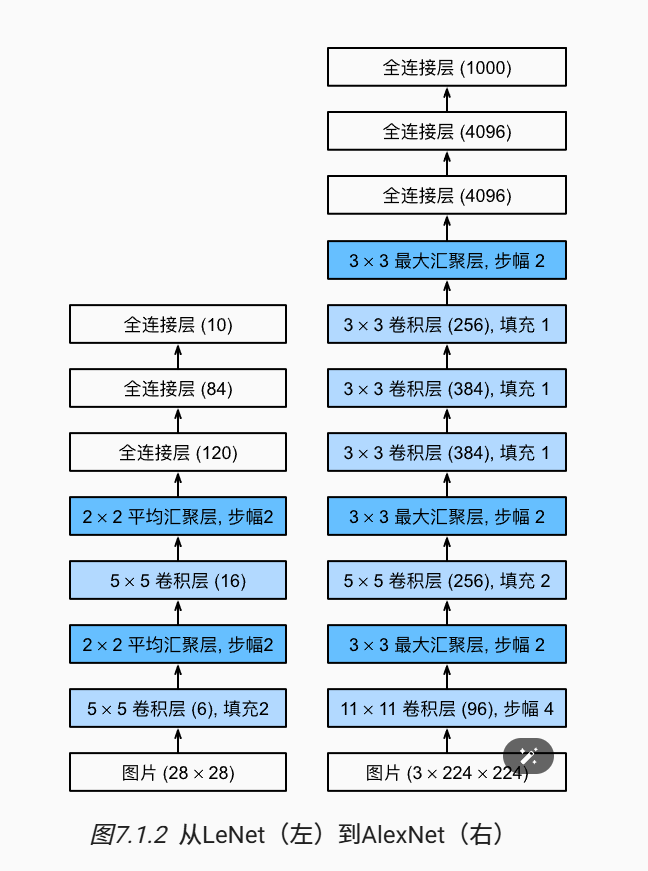

AlexNet的特点
1. 深，输出通道数远大于LeNet
2. 使用ReLU作为激活函数
3. 使用dropout和图像增强

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    # 使用更大的窗口11*11来捕捉对象
    # 步幅为4，以减少输出的高度和宽度
    # 输出通道数远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用padding为2来使得输入输出高宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和减小的卷积窗口（3 * 3）
    # 除了最后的卷积层，输出通道数量在进一步增加
    # 在前两个卷积层之后，不用pooling层
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 全连接层的输出数量是LeNet中的好几倍。使用dropout来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),  # 随机丢弃前一层的一半的输出
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层，由于这里使用的是Fashion-MNIST，所以类别数为10
    nn.Linear(4096, 10)
)

In [2]:
# 我们构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [3]:
# 读取数据集
# 原文是在ImageNet上训练的，这里使用的是Fashion-MNIST。
# 因为即使是现代GPU，训练ImageNet，使其收敛可能需要数小时或数天的时间
# 但由于Fashion-MNIST图像分辨率低于ImageNet图像，我们需要将它增加到224*224（不明智，这里仅为演示）
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.327, train acc 0.880, test acc 0.880
1655.9 examples/sec on cuda:0


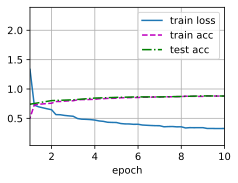

In [4]:
# 训练AlexNet
# 与LeNet的区别是：AlexNet用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())